In [1]:
import os
from pathlib import Path
import sys

# path to project root (one level up from scripts/)
project_root = Path.cwd().parent

# Add 'src' to sys.path so Python can find 'src' packages
src_folder = project_root / "src"
sys.path.append(str(src_folder))

# import from src folder
from data_preprocessing import *
from config import orders_path, products_path, departments_path, aisles_path, order_products_path

In [2]:
# load data
orders = load_data(orders_path)
products = load_data(products_path)
departments = load_data(departments_path)
aisles = load_data(aisles_path)
order_products = load_data(order_products_path)

In [6]:
print(orders.describe(include='all'))

           order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478967.000000           450148.000000  
mean           13.446676               11.101751  
std             4.224986                9.189975  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000                7.000000  
75%            16.000000      

                   Wednesday_orders  Saturday_orders
order_hour_of_day                                   
0                               373              464
1                               215              254
2                               121              177
3                               101              125
4                               108              118
5                               170              161
6                               643              451
7                              1732             1619
8                              3125             3246
9                              4490             4311
10                             5026             4919
11                             5004             5116
12                             4688             5132
13                             4674             5323
14                             4774             5375
15                             5163             5188
16                             4976           

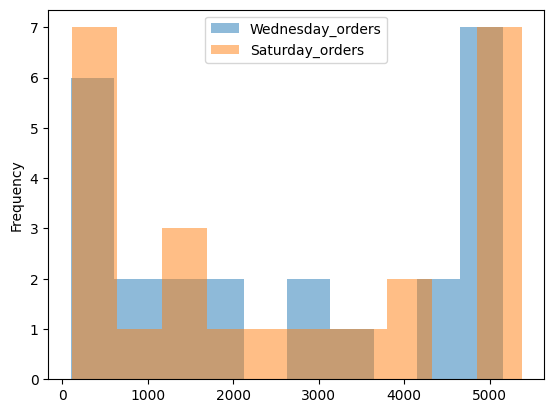

In [4]:
#probe: Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays:
#Wednesday orders
Wednesday_orders = orders[orders['order_dow'] == 3]
Wednesday_orders_per_hour_of_day = (
    Wednesday_orders['order_hour_of_day']
    .value_counts()
    .sort_index())

#Saturday orders
Saturday_orders = orders[orders['order_dow'] == 6]
Saturday_orders_per_hour_of_day = (
    Saturday_orders['order_hour_of_day']
    .value_counts()
    .sort_index())

# make Wednesday Saturday df
order_hour_of_day_Wednesdays_Saturdays = (
    pd.concat([Wednesday_orders_per_hour_of_day,
               Saturday_orders_per_hour_of_day],
              axis = 1))
order_hour_of_day_Wednesdays_Saturdays.columns = ['Wednesday_orders','Saturday_orders']
print(order_hour_of_day_Wednesdays_Saturdays)

# plot
order_hour_of_day_Wednesdays_Saturdays['Wednesday_orders'].plot(
    kind='hist',
    #bins=30,
    label='Wednesday_orders',
    alpha=0.5
)

order_hour_of_day_Wednesdays_Saturdays['Saturday_orders'].plot(
    kind='hist',
    #bins=30,
    label='Saturday_orders',
    alpha=0.5
)

plt.legend()
plt.show()